# Pruning the Decision Tree
In this example we are directly given two different datasets, one will be used for training, the other for testing.

We will start training the model with the training data, then testing it with the test data.

Then we will observe the resulting tree, and try to improve the result with pruning.

Start importing `pandas` and `numpy`, then assign to the variables `in_train` and `in_test` the strings `binaries_train.csv` and `binaries_test.csv`.

--> Insert your code in a new cell after this one

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
in_train = Path('binaries_train.csv')
in_test = Path('binaries_test.csv')

if not in_train.is_file():
    # file exists
  from google.colab import files
  print('Select input files for train and test')
  uploaded = files.upload()

Read the `in_train` file into the `train` dataframe and inspect it.

--> Insert your code in a new cell after this one

In [2]:
train = pd.read_csv(in_train)
train.head()

,B1,B2,B3,B4,B5,Class
0,0,0,0,0,0,0
1,0,0,0,0,1,1
2,0,0,0,1,0,0
3,0,0,0,1,1,1
4,0,0,1,0,0,1


Prepare the `X_train` variable, by dropping the last column of `train`, and the `y_train` variable with the last column of `train`, then inspect the shapes.

--> Insert your code in a new cell after this one

In [3]:
X_train = train.drop(labels='Class', axis=1) # both alternatives looks good
X_train = train.drop(train.columns[-1], axis = 1) # drop the last column
X_train.shape

(32, 5)

In [4]:
pd


<module 'pandas' from '/home/fabioc/Documents/DataMiningStudyRepo/Practice/DataMiningEnv/lib/python3.11/site-packages/pandas/__init__.py'>

In [5]:
#y_train = train.drop(train.columns[0:-1], axis = 1) # drop all the columns but the last
y_train = train.iloc[:,-1]
y_train.shape

(32,)

## Train a full tree
With the `fit` method we will train the __Decision Tree__. 

The parameters for the training are set in the creation of the `model`. 

In this case we will set only the 'split criterion' to `entropy`. Don't forget to import the `tree.DecisionTreeClassifier` from `sklearn`.

--> Insert your code in a new cell after this one

In [6]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Now use the trained `model` to predict `y_predicted_train` from `X_train`.

Evaluate the percentage of matches between `y_predicted_train` and `y_train`. 

Hint: you can use `np.mean` on the comparison of the two vectors.

--> Insert your code in a new cell after this one

In [7]:
y_predicted_train = model.predict(X_train)
y_predicted_train

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [8]:
accuracy_train = np.mean(y_train == y_predicted_train) * 100
print("The accuracy on training set is {0:.1f}%".format(accuracy_train))

The accuracy on training set is 100.0%


Now we load the test set, make the prediction using the already trained model and compute the accuracy.

--> Insert your code in a new cell after this one

In [9]:
test=pd.read_csv(in_test)
X_test = test.drop(test.columns[-1], axis = 1) # drop the last column
y_test = test.iloc[:,-1] # keep only the last column
y_predicted_test = model.predict(X_test)
accuracy_test = np.mean(y_test == y_predicted_test) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))

The accuracy on test set is 56.2%


### Observe the tree
Import the following and set the size of the figure as below

`from matplotlib.pyplot import figure
figure(figsize = (25,25))`

Plot the tree with the `tree.plot_tree` function. Use as parameters the `model, rounded = True, filled = True`. 

Use as `feature_names` the column names of train. Use as `class_names` 'False' and 'True'

The tree generated has a number of internal node levels equal to the number of predicting attributes.

--> Insert your code in a new cell after this one

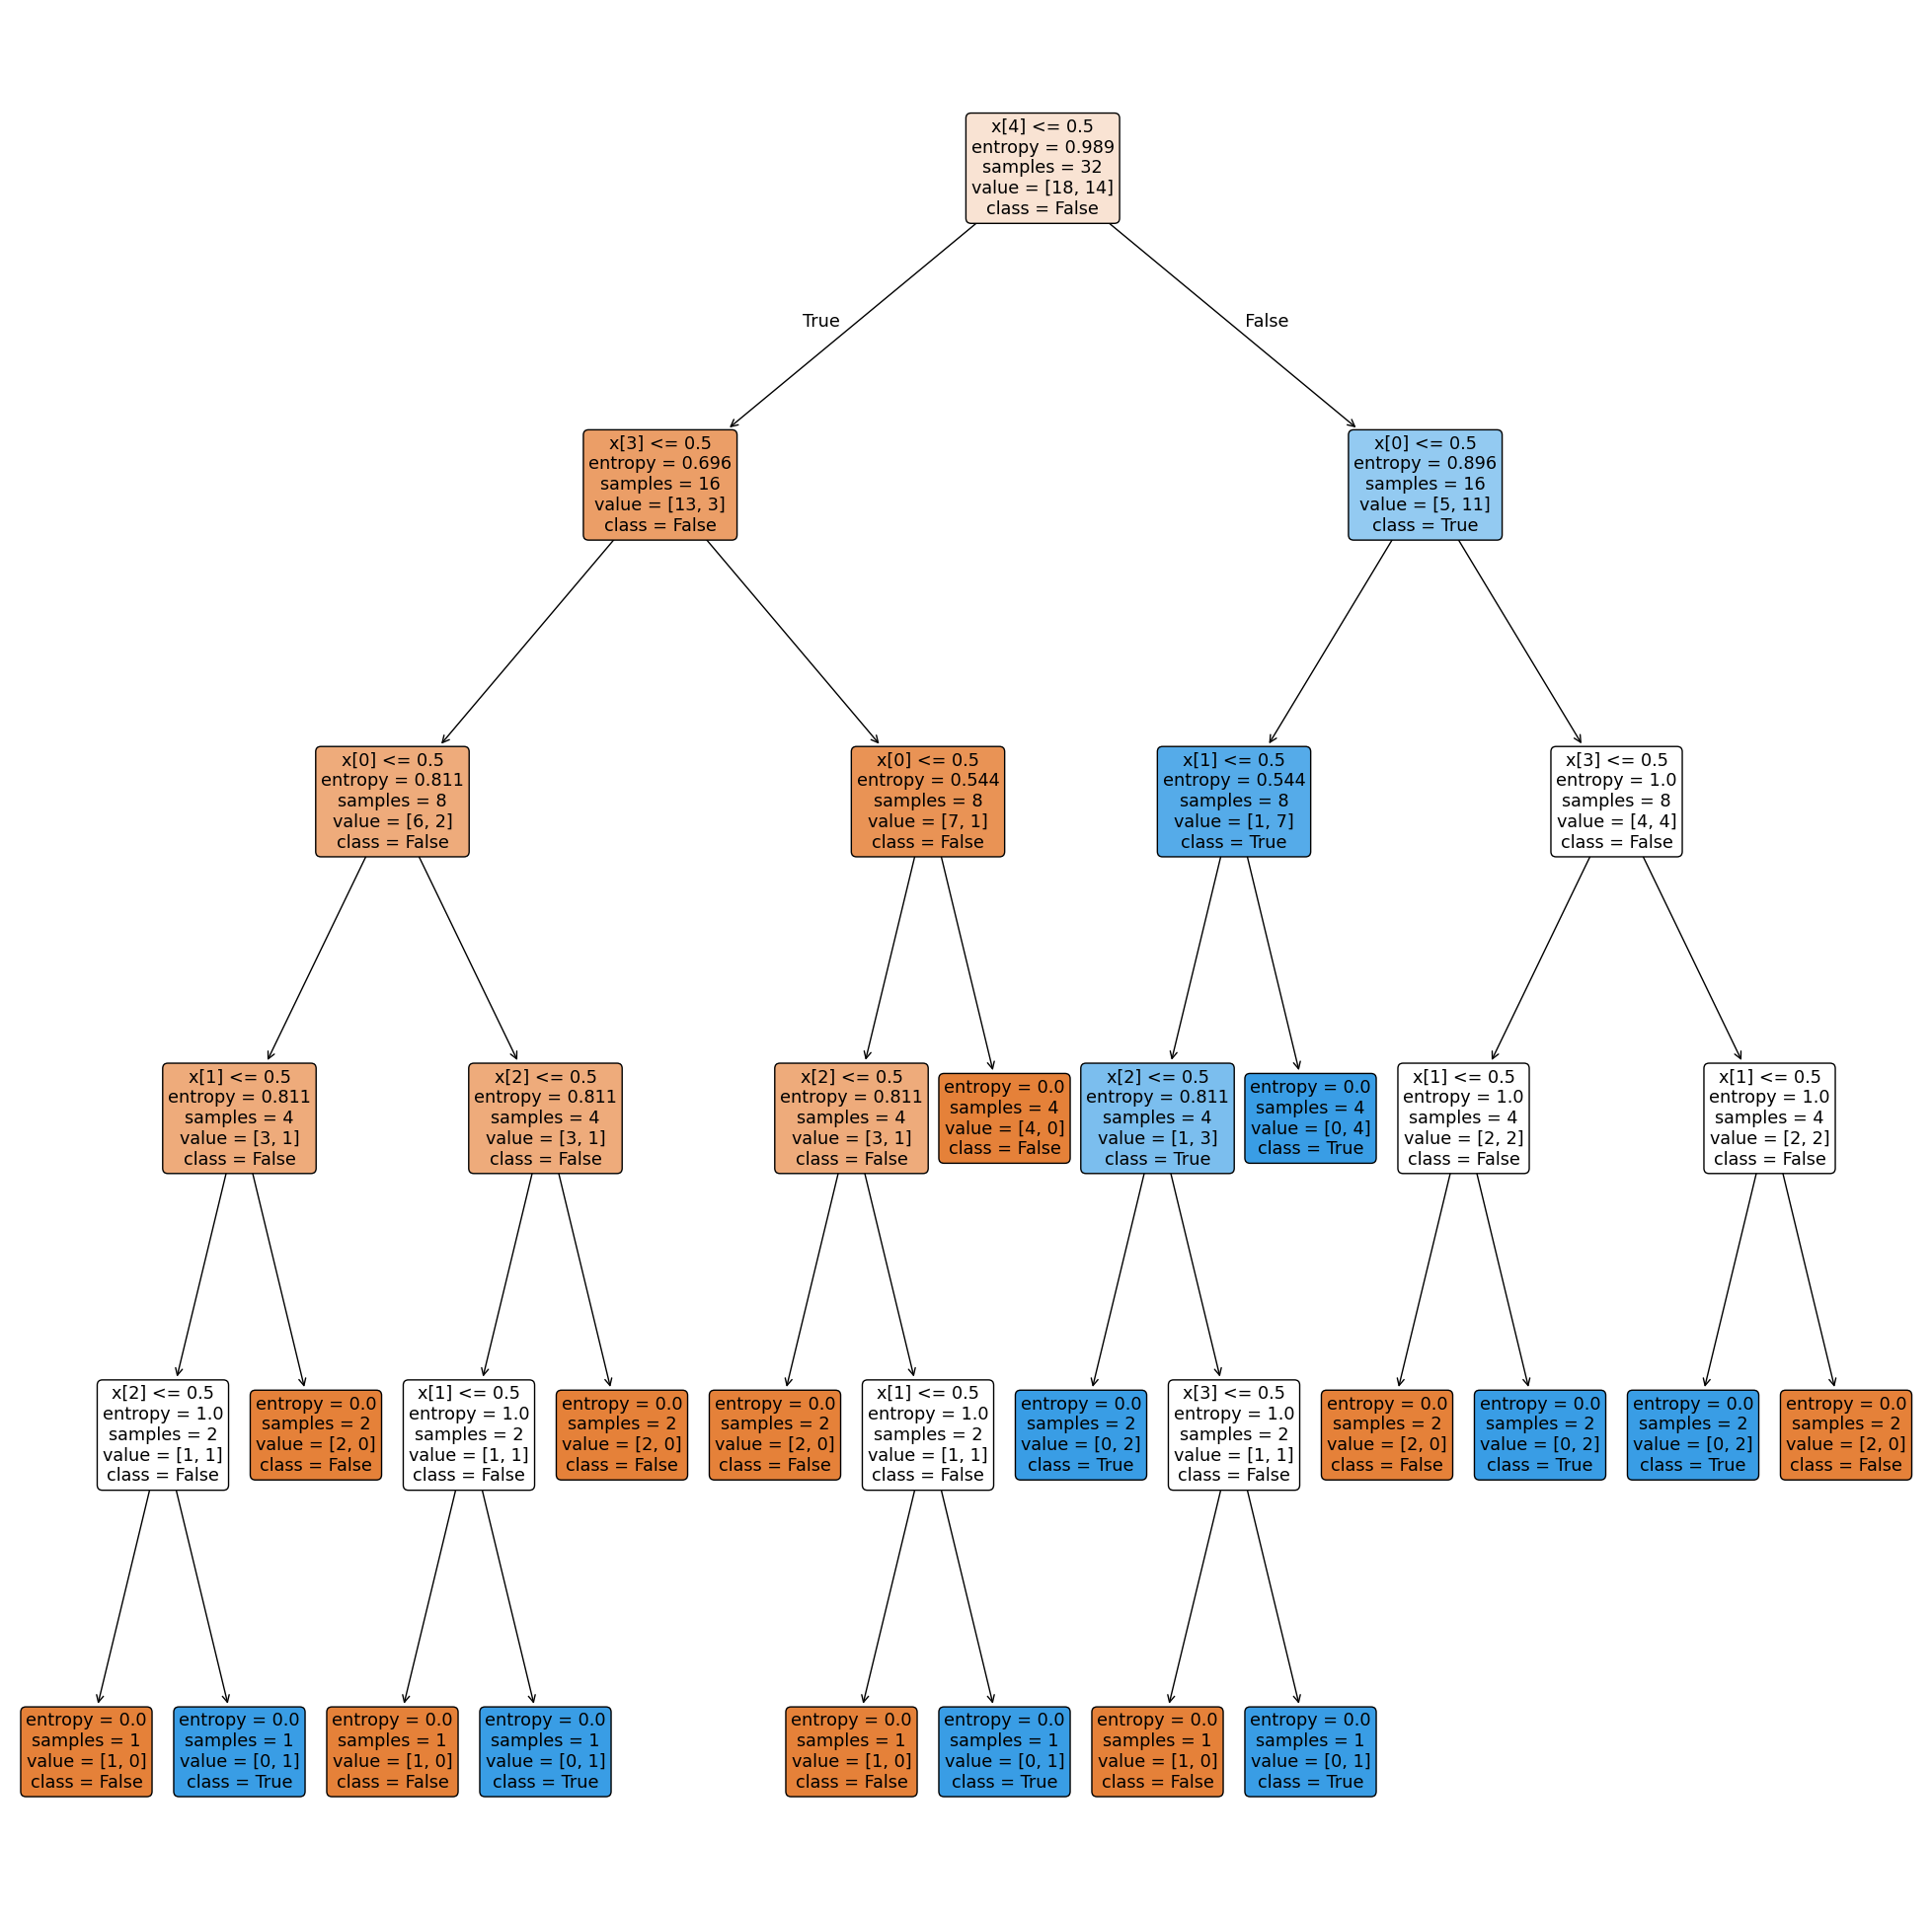

In [17]:
from matplotlib.pyplot import figure 
figure(figsize=(25,25))
tree.plot_tree(model,rounded=True,filled=True,class_names = ['False', 'True']);

Try to understand better the tree by plotting only the first two levels under the root. 
This is obtained with the parameter `max_depth = 2`. Remember that here we are not changing the tree, but only displaying the upper part of the tree.

--> Insert your code in a new cell after this one

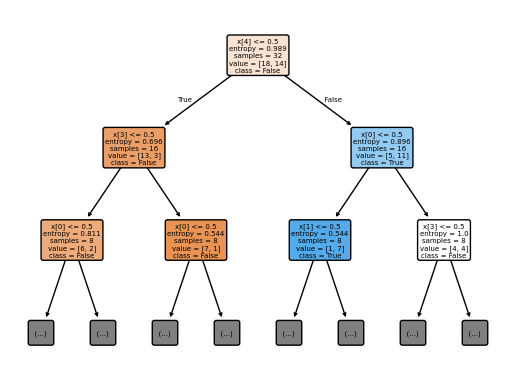

In [14]:
tree.plot_tree(model,rounded=True,filled=True,class_names = ['False', 'True'], max_depth=2);

## Pruned tree
From the observation of the tree, choose an appropriate value for `max_dept` and redo the training using the parameter `max_depth = max_depth` in the `fit` method. Compute the accuracy on the training set, and then on the test set.

--> Insert your code in a new cell after this one